# Kid's Drawings

### Imports

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
import math 
import warnings
warnings.filterwarnings('ignore')

#### Collect all the pictures into list of Dataframes

In [2]:
dfs = []
for i in range(1,22):
    dfs.append(pd.read_csv('C:\\Users\\Shlomit\\Desktop\\Data-Science-project-2\\drawings pandas\\train\\7554\\SimpleTest\\' + str(i) + '.csv'))

In [3]:
for df in dfs:
    df[' Time'] = pd.to_datetime(df[' Time'])

In [4]:
dfs[0]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:36
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:37
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,2022-06-13 00:12:38
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,2022-06-13 00:12:39
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,2022-06-13 00:12:41
...,...,...,...,...,...,...
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,2022-06-13 00:14:03
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,2022-06-13 00:14:04
131,584.653193209377,646.741656,0.389151,-4501.0,1991.0,2022-06-13 00:14:05
132,Time Elapsed till drawing started: 00:11.2234987,NaN,NaN,NaN,NaN,NaT


In [5]:
dfs[0][' Time'][0].second

36

#### Convert columns names

In [6]:
for i in range(21):
    dfs[i] = dfs[i].rename({' Y':'Y',' Pressure':'Pressure',' TiltX':'TiltX',' TiltY':'TiltY',' Time':'Time'},axis=1)

In [7]:
dfs[0].columns


Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

#### Drop the last two rows

In [8]:
for i in range(21):
    dfs[i].drop(dfs[i].tail(2).index,inplace=True) 

#### Change X colmun to float

In [9]:
for i in range(21):
    dfs[i].X=dfs[i].X.astype("float")


In [10]:
dfs[11].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   X         527 non-null    float64       
 1   Y         527 non-null    float64       
 2   Pressure  527 non-null    float64       
 3   TiltX     527 non-null    float64       
 4   TiltY     527 non-null    float64       
 5   Time      527 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 28.8 KB


In [11]:
dfs[0]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:36
1,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:37
2,926.692690,665.647303,0.082506,-4917.0,669.0,2022-06-13 00:12:38
3,927.008662,665.647303,0.115953,-4917.0,669.0,2022-06-13 00:12:39
4,927.324633,665.594641,0.140368,-4917.0,669.0,2022-06-13 00:12:41
...,...,...,...,...,...,...
127,585.495785,647.004966,0.378408,-4510.0,1946.0,2022-06-13 00:14:01
128,584.863841,646.846980,0.382803,-4510.0,1946.0,2022-06-13 00:14:02
129,584.863841,646.846980,0.386954,-4510.0,1946.0,2022-06-13 00:14:03
130,584.653193,646.741656,0.386954,-4501.0,1991.0,2022-06-13 00:14:04


#### Plot some photos

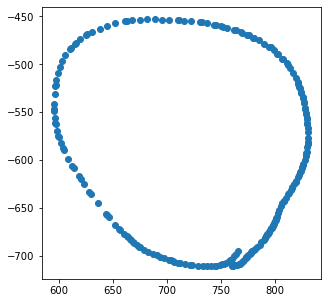

In [13]:
plt.figure (figsize = (5,5))
plt.plot(dfs[2]['X'],-dfs[2]['Y'],'o')
ax = plt.gca()


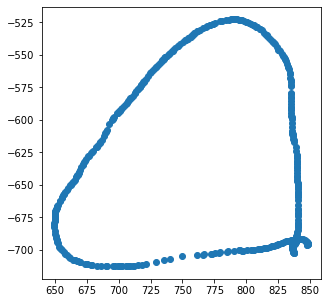

In [14]:
plt.figure (figsize = (5,5))
plt.plot(dfs[3]['X'],-dfs[3]['Y'],'o')
ax = plt.gca()

In [15]:
dfs[10]

,X,Y,Pressure,TiltX,TiltY,Time
0,968.558956,611.089502,0.113756,-4045.0,1362.0,2022-06-13 00:08:25
1,968.874928,611.142164,0.115709,-4045.0,1362.0,2022-06-13 00:08:26
2,970.138815,611.036840,0.137194,-4045.0,1362.0,2022-06-13 00:08:27
3,970.402125,611.036840,0.207263,-4045.0,1362.0,2022-06-13 00:08:28
4,970.402125,611.036840,0.296376,-4045.0,1362.0,2022-06-13 00:08:29
...,...,...,...,...,...,...
817,879.033607,505.607576,0.625727,-3260.0,1718.0,2022-06-13 00:27:35
818,879.191593,505.449590,0.608148,-3260.0,1718.0,2022-06-13 00:27:36
819,879.454902,505.186280,0.596918,-3260.0,1718.0,2022-06-13 00:27:36
820,879.454902,505.186280,0.586175,-3260.0,1718.0,2022-06-13 00:27:37


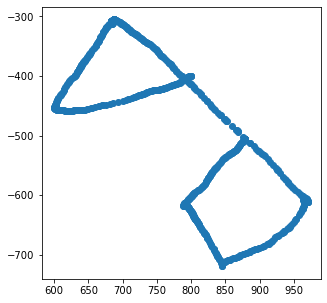

In [16]:
plt.figure (figsize = (5,5))
plt.plot(dfs[10]['X'],-dfs[10]['Y'],'o')
ax = plt.gca()

In [191]:
def distance(x1,x2,y1,y2):
    return math.sqrt(pow(x1-x2,2)+pow(y1-y2,2))

In [192]:
for df in dfs:
    dist=[]
    for i in range(0,len(df)-1):
        dist.append(distance(df.loc[i]['X'],df.loc[i+1 ]['X'],df.loc[i]['Y'],df.loc[i+1]['Y']))
    dist.append(0)
    df['distance']=dist

### Question 3 - Hands lifted

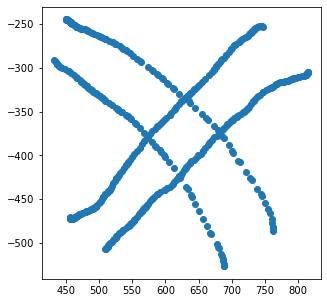

In [17]:
plt.figure (figsize = (5,5))
plt.plot(dfs[11]['X'],-dfs[11]['Y'],'o', marker='o')
ax = plt.gca()

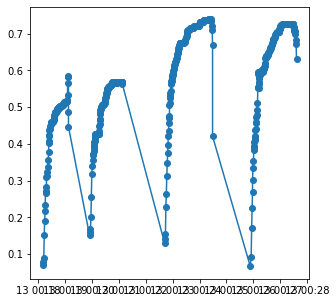

In [18]:
plt.figure (figsize = (5,5))
plt.plot(dfs[11]['Time'],dfs[11]['Pressure'],'-o')

### The algorithm of lift hand

In [205]:
def liftHandCount(df):
    count = 0
    for i in range (0 ,len(df['Pressure'])-1):
        if abs(df.loc[i,'Pressure']-df.loc[i+1,'Pressure'])>0.25:
            count += 1
        elif df.loc[i,'distance']>30:
            count += 1
    return count   

In [207]:
print(liftHandCount(dfs[6]))

9


In [200]:
dfs[11]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,688.818570,526.514378,0.071031,-4515.0,2197.0,2022-06-13 00:18:11,0.805573
1,688.660584,525.724449,0.078355,-4515.0,2197.0,2022-06-13 00:18:12,2.086637
2,688.291951,523.670632,0.089586,-4515.0,2197.0,2022-06-13 00:18:13,3.336043
3,687.607345,520.405590,0.152819,-4515.0,2197.0,2022-06-13 00:18:14,2.814830
4,686.764753,517.719829,0.191394,-4515.0,2197.0,2022-06-13 00:18:15,3.326053
5,685.448204,514.665435,0.217273,-4515.0,2197.0,2022-06-13 00:18:16,2.943894
6,684.131655,512.032336,0.233631,-4515.0,2197.0,2022-06-13 00:18:16,7.858112
7,680.182007,505.238942,0.267323,-4515.0,2197.0,2022-06-13 00:18:17,1.535347
8,679.392078,503.922393,0.272938,-4515.0,2197.0,2022-06-13 00:18:18,3.490817
9,677.443585,501.025985,0.283192,-4515.0,2197.0,2022-06-13 00:18:19,13.609324


### Question 1 - Lines counting

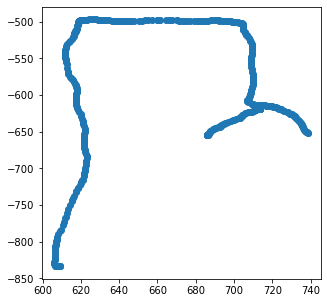

In [22]:
plt.figure (figsize = (5,5))
plt.plot(dfs[4]['X'],-dfs[4]['Y'],'o')
ax = plt.gca()


In [218]:
dfs[6]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,571.329715,364.894792,0.190661,-3352.0,2845.0,2022-06-13 00:02:14,0.659853
1,571.908996,364.578820,0.202380,-3352.0,2845.0,2022-06-13 00:02:15,1.212370
2,572.909574,363.894214,0.237781,-3352.0,2845.0,2022-06-13 00:02:16,0.223426
3,573.067560,363.736228,0.239979,-3352.0,2845.0,2022-06-13 00:02:17,0.000000
4,573.067560,363.736228,0.230701,-3352.0,2845.0,2022-06-13 00:02:17,65.540313
5,619.778727,409.710128,0.260487,-4405.0,2788.0,2022-06-13 00:03:01,0.595802
6,620.200023,409.288832,0.276600,-4405.0,2788.0,2022-06-13 00:03:02,0.000000
7,620.200023,409.288832,0.268055,-4276.0,2682.0,2022-06-13 00:03:03,0.000000
8,620.200023,409.288832,0.277577,-4102.0,2544.0,2022-06-13 00:03:04,0.000000
9,620.200023,409.288832,0.282460,-4102.0,2544.0,2022-06-13 00:03:05,0.569626


### The algorithm of Counting lines

In [237]:
def linesCount(df):
    count = 0
    index = []
    if df.loc[0 , 'X'] < df.loc[1 , 'X']:
        direct_x = 1
    else :
        direct_x = -1
    if df.loc[0 , 'Y'] < df.loc[1 , 'Y']:
          direct_y = 1
    else:
          direct_y = -1
            
    for i in range (1,len(df['Y'])-1):
        if df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_x = -1
                direct_y = -1
                index.append(i)
                #print(i,1)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
            direct_x = -1
            direct_y = 1
            index.append(i)
            #print(i,2)
            
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
            direct_x = 1
            direct_y = -1 
            index.append(i)
           # print(i,3)
        
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_x = 1
                direct_y = 1
                index.append(i)
                
               # print(i,4)
        
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1:
                direct_x = -1
                index.append(i)
               # print(i,5)

        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1:
                direct_x = 1
                index.append(i)
               # print(i,6)
                
        elif df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_y = -1
                index.append(i)
               # print(i,7)
                
        elif df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_y = 1
                index.append(i)
               # print(i,8)
            
    count_index=1
    for i in range (0,(len(index)-1)):
        if index[i]+40 < index[i+1]:
            count_index+=1
    
    if count_index<liftHandCount(df):
        return liftHandCount(df)
    
    return count_index    

In [238]:
linesCount(dfs[4])

5

In [239]:
linesCount(dfs[6])

9

In [240]:
dfs[5]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,758.016399,569.381222,0.088853,-4282.0,2245.0,2022-06-13 00:02:42,0.217131
1,758.069061,569.170574,0.108629,-4282.0,2245.0,2022-06-13 00:02:43,0.000000
2,758.069061,569.170574,0.141833,-4011.0,2058.0,2022-06-13 00:02:44,0.000000
3,758.069061,569.170574,0.170397,-3961.0,2025.0,2022-06-13 00:02:45,0.000000
4,758.069061,569.170574,0.186267,-3961.0,2025.0,2022-06-13 00:02:46,0.000000
5,758.069061,569.170574,0.195544,-3961.0,2025.0,2022-06-13 00:02:46,0.000000
6,758.069061,569.170574,0.206531,-3961.0,2025.0,2022-06-13 00:02:47,0.549807
7,757.911075,569.697194,0.220691,-3961.0,2025.0,2022-06-13 00:02:48,1.084376
8,757.384455,570.645109,0.254139,-3961.0,2025.0,2022-06-13 00:02:49,0.588779
9,757.121146,571.171729,0.269032,-3961.0,2025.0,2022-06-13 00:02:49,0.000000


In [241]:
linesCount(dfs[10])

6

### Question 2 - Calculate the length of the line & the average pressure

In [92]:
def linesCountReturnList(df):
    count = 0
    index = []
    if df.loc[0 , 'X'] < df.loc[1 , 'X']:
        direct_x = 1
    else :
        direct_x = -1
    if df.loc[0 , 'Y'] < df.loc[1 , 'Y']:
          direct_y = 1
    else:
          direct_y = -1
    for i in range (1,len(df['Y'])-1):
        if df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_x = -1
                direct_y = -1
                index.append(i)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
            direct_x = -1
            direct_y = 1
            index.append(i)
            
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
            direct_x = 1
            direct_y = -1 
            index.append(i)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_x = 1
                direct_y = 1
                index.append(i)
                        
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1:
                direct_x = -1
                index.append(i)

        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1:
                direct_x = 1
                index.append(i)
                
        elif df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_y = -1
                index.append(i)
                
        elif df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_y = 1
                index.append(i)

    startLines=[index[0]]
    for i in range (0,(len(index)-1)):
        if index[i]+40 < index[i+1]:
            startLines.append(index[i+1])
            
    return startLines    

In [168]:
linesCountReturnList(dfs[11])


[91, 208, 373, 524]

In [169]:
dfs[11]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,688.818570,526.514378,0.071031,-4515.0,2197.0,2022-06-13 00:18:11,0.805573
1,688.660584,525.724449,0.078355,-4515.0,2197.0,2022-06-13 00:18:12,2.086637
2,688.291951,523.670632,0.089586,-4515.0,2197.0,2022-06-13 00:18:13,3.336043
3,687.607345,520.405590,0.152819,-4515.0,2197.0,2022-06-13 00:18:14,2.814830
4,686.764753,517.719829,0.191394,-4515.0,2197.0,2022-06-13 00:18:15,3.326053
...,...,...,...,...,...,...,...
522,739.216076,253.567387,0.705806,-2757.0,-1514.0,2022-06-13 00:27:32,2.018404
523,741.164569,253.040767,0.697749,-2757.0,-1514.0,2022-06-13 00:27:33,2.848132
524,744.008315,252.882781,0.682612,-2757.0,-1514.0,2022-06-13 00:27:34,1.320755
525,745.324864,252.988105,0.672847,-2757.0,-1514.0,2022-06-13 00:27:35,2.547446


In [185]:
linesCount(dfs[12])

9

In [162]:
def linesLength(df):
    lines=linesCountReturnList(df)
    sum=0
    for j in range (0,lines[1]):
            sum += df.loc[j]['distance']
    print('The length of line',1,'is:',sum)
        
    for i in range (1,len(lines)-1):
        sum=0
        for j in range (lines[i],lines[i+1]):
            sum += df.loc[j]['distance']
        print('The length of line',i+1,'is',sum)
     
    sum=0
    for j in range (lines[len(lines)-1],len(df)-1):
            sum += df.loc[j]['distance']
    print('The length of line',len(lines),' is: ',sum)

In [178]:
linesLength(dfs[10])

The length of line 1 is: 422.6469914290229
The length of line 2 is 182.48986120957457
The length of line 3 is 223.6840807221298
The length of line 4 is 442.2714035911501
The length of line 5 is 116.04066440002829
The length of line 6  is:  150.308952781483


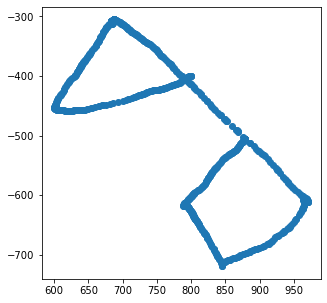

In [179]:
plt.figure (figsize = (5,5))
plt.plot(dfs[10]['X'],-dfs[10]['Y'],'o')
ax = plt.gca()


In [182]:
def linesPressureAverage(df):
    lines=linesCountReturnList(df)
    count=0
    sum=0
    for j in range (0,lines[1]):
        count+=1
        sum += df.loc[j]['Pressure']
    print('The average pressure of line',1,'is:',sum/count)
        
    for i in range (1,len(lines)-1):
        count=0
        sum=0
        for j in range (lines[i],lines[i+1]):
            count+=1
            sum += df.loc[j]['Pressure']
        print('The average pressure of line',i+1,'is',sum/count)
    count=0 
    sum=0
    for j in range (lines[len(lines)-1],len(df)-1):
        count+=1
        sum += df.loc[j]['Pressure']
    print('The average pressure of line',len(lines),'is:',sum/count)

In [183]:
linesPressureAverage(dfs[10])

The average pressure of line 1 is: 0.7995869270970474
The average pressure of line 2 is 0.5295687162114265
The average pressure of line 3 is 0.6801272498456058
The average pressure of line 4 is 0.5730275103920385
The average pressure of line 5 is 0.5808806071678797
The average pressure of line 6 is: 0.6615718515175912


### Question 4 - Shapes is closed or open

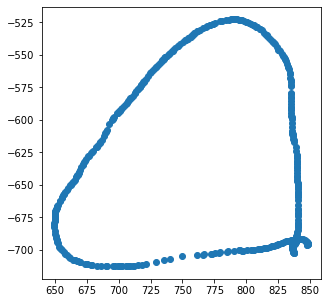

In [186]:
plt.figure (figsize = (5,5))
plt.plot(dfs[3]['X'],-dfs[3]['Y'],'o')
ax = plt.gca()

In [189]:
pd.set_option('display.max_rows', None)

dfs[6]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,571.329715,364.894792,0.190661,-3352.0,2845.0,2022-06-13 00:02:14,0.659853
1,571.908996,364.578820,0.202380,-3352.0,2845.0,2022-06-13 00:02:15,1.212370
2,572.909574,363.894214,0.237781,-3352.0,2845.0,2022-06-13 00:02:16,0.223426
3,573.067560,363.736228,0.239979,-3352.0,2845.0,2022-06-13 00:02:17,0.000000
4,573.067560,363.736228,0.230701,-3352.0,2845.0,2022-06-13 00:02:17,65.540313
5,619.778727,409.710128,0.260487,-4405.0,2788.0,2022-06-13 00:03:01,0.595802
6,620.200023,409.288832,0.276600,-4405.0,2788.0,2022-06-13 00:03:02,0.000000
7,620.200023,409.288832,0.268055,-4276.0,2682.0,2022-06-13 00:03:03,0.000000
8,620.200023,409.288832,0.277577,-4102.0,2544.0,2022-06-13 00:03:04,0.000000
9,620.200023,409.288832,0.282460,-4102.0,2544.0,2022-06-13 00:03:05,0.569626


In [ ]:
def closeOrOpen(df):
    